In [851]:
from data_loader import load_latest_iteration, load_all_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [852]:
bbpgd_data = load_all_files(
    f"../code/cpp/build/src/logs/data","bbpgdtrace")

In [853]:
bbpgd_data

,iteration,step,residual,step_size,linear,quadratic,growth,total,x,y,z,rank
2,1,10,0.004454,30.1886,-0.154857,3.98163,3151.68,3155.51,NaN,NaN,NaN,0
4,2,20,0.041790,140.4120,-0.276537,6.16974,3147.65,3153.55,NaN,NaN,NaN,0
0,3,30,0.001752,31.8060,-0.315424,7.43883,3145.81,3152.93,NaN,NaN,NaN,0
3,4,40,0.001217,31.1743,-0.326259,8.06007,3145.09,3152.83,NaN,NaN,NaN,0
1,5,50,0.000431,125.2610,-0.342666,8.83067,3144.27,3152.76,NaN,NaN,NaN,0


In [854]:
tolerance = 1e-3

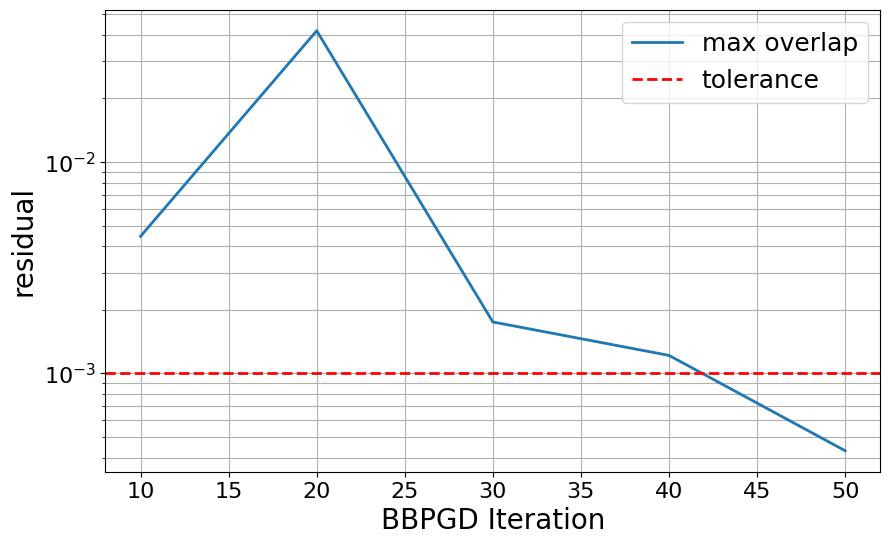

In [855]:
fig, ax = plt.subplots(figsize=(10, 6))


plt.plot(bbpgd_data['step'], bbpgd_data['residual'],
         label='max overlap', linewidth=2)

# plt.yscale('log')
plt.xlabel('BBPGD Iteration', fontsize=20)
plt.ylabel('residual', fontsize=20)
plt.yscale('log')

plt.axhline(y=tolerance, color='red', linestyle='--',
            label='tolerance', linewidth=2)

ax.tick_params(axis='y', which='both', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

ax.grid(True, which="both")
ax.legend(fontsize=18)

fig.savefig('bbpgd_residual.png', dpi=300, bbox_inches='tight')

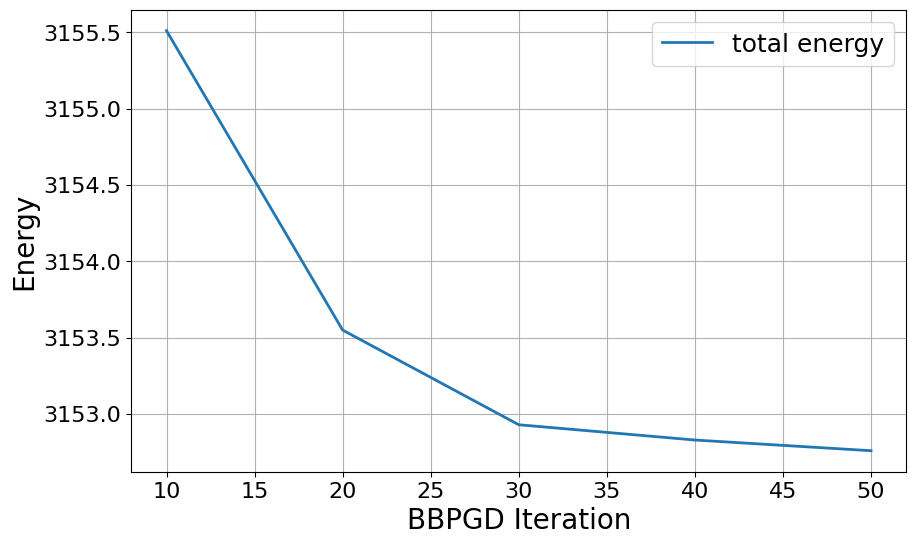

In [856]:
fig, ax = plt.subplots(figsize=(10, 6))


# plt.plot(bbpgd_data['iteration'], bbpgd_data['linear'], label='linear')
# plt.plot(bbpgd_data['iteration'], bbpgd_data['quadratic'], label='quadratic')
# plt.plot(bbpgd_data['iteration'], bbpgd_data['growth'], label='growth')
plt.plot(bbpgd_data['step'], bbpgd_data['total'],
         label='total energy', linewidth=2)


plt.xlabel('BBPGD Iteration', fontsize=20)
plt.ylabel('Energy', fontsize=20)

ax.tick_params(axis='y', which='both', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

ax.grid(True, which="both")
ax.legend(fontsize=18)

fig.savefig('energy.png', dpi=300, bbox_inches='tight')